In [78]:
import pandas as pd

In [79]:
path = '/Users/alenapominova/Downloads/Customer-Churn-Records.csv'
df = pd.read_csv(path)

In [80]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [82]:
isexited = df['Exited'].value_counts(normalize=True)*100
print(isexited)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


<Axes: >

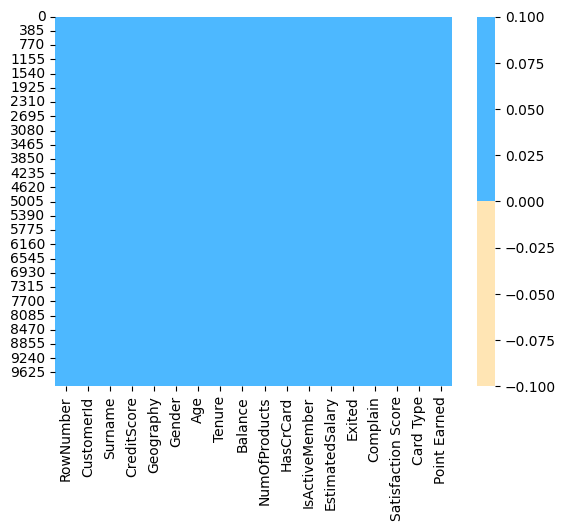

In [83]:
import seaborn as sns
columns = df.columns
colors = ['#FFE5B4','#4DB8FF']
sns.heatmap(df[columns].isnull(),cmap = sns.color_palette(colors))

In [84]:
print(df.shape)
df_cleaned = df.loc[~df.duplicated(),:].reset_index(drop=True)
print(df_cleaned.shape)

(10000, 18)
(10000, 18)


<Axes: >

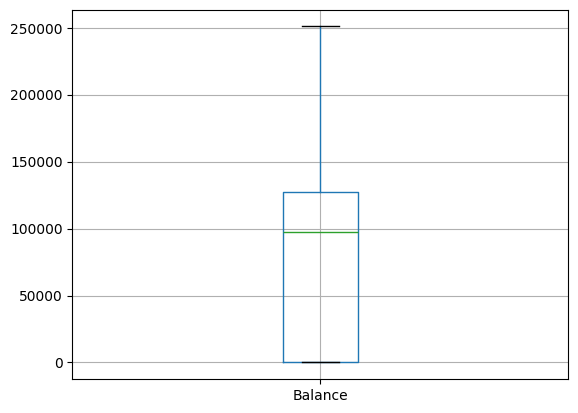

In [85]:
df.boxplot(column='Balance')

In [86]:
zero_balance = df[df.Balance == 0]
print(len(zero_balance))

3617


In [87]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(['RowNumber','CustomerId'],axis=1)
corr_matrix = numeric_df.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


  Geography  Gender  count
0    France       1   2753
1    France       0   2261
2   Germany       1   1316
3   Germany       0   1193
4     Spain       1   1388
5     Spain       0   1089


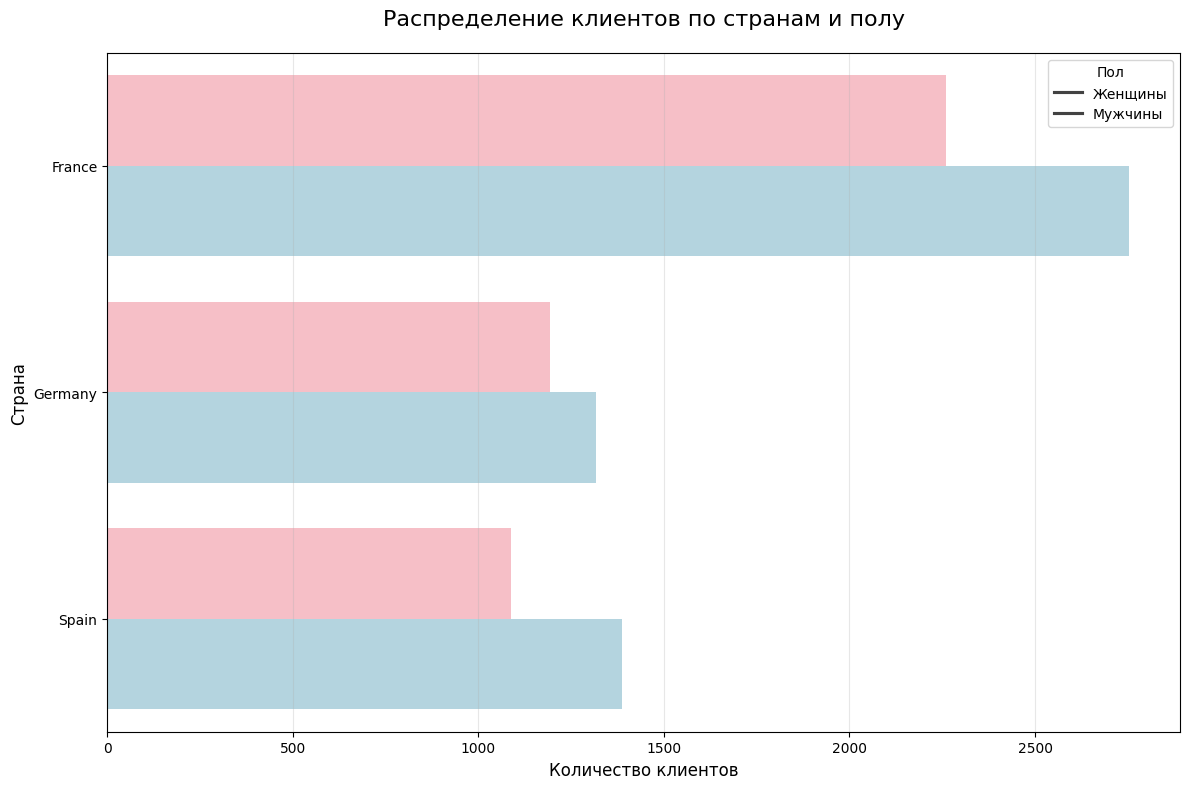

In [93]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
gender_country = df.groupby('Geography')['Gender'].value_counts().reset_index()
print(gender_country)
plt.figure(figsize=(12, 8))

sns.barplot(data=gender_country, 
            y='Geography', 
            x='count', 
            hue='Gender',
            palette=['lightpink', 'lightblue'],
            orient='h')

plt.title('Распределение клиентов по странам и полу', fontsize=16, pad=20)
plt.ylabel('Страна', fontsize=12)
plt.xlabel('Количество клиентов', fontsize=12)
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


                         Age    Gender   Balance  Satisfaction Score
Age                 1.000000 -0.019304 -0.152370            0.004461
Gender             -0.019304  1.000000  0.052916           -0.019867
Balance            -0.152370  0.052916  1.000000           -0.027587
Satisfaction Score  0.004461 -0.019867 -0.027587            1.000000


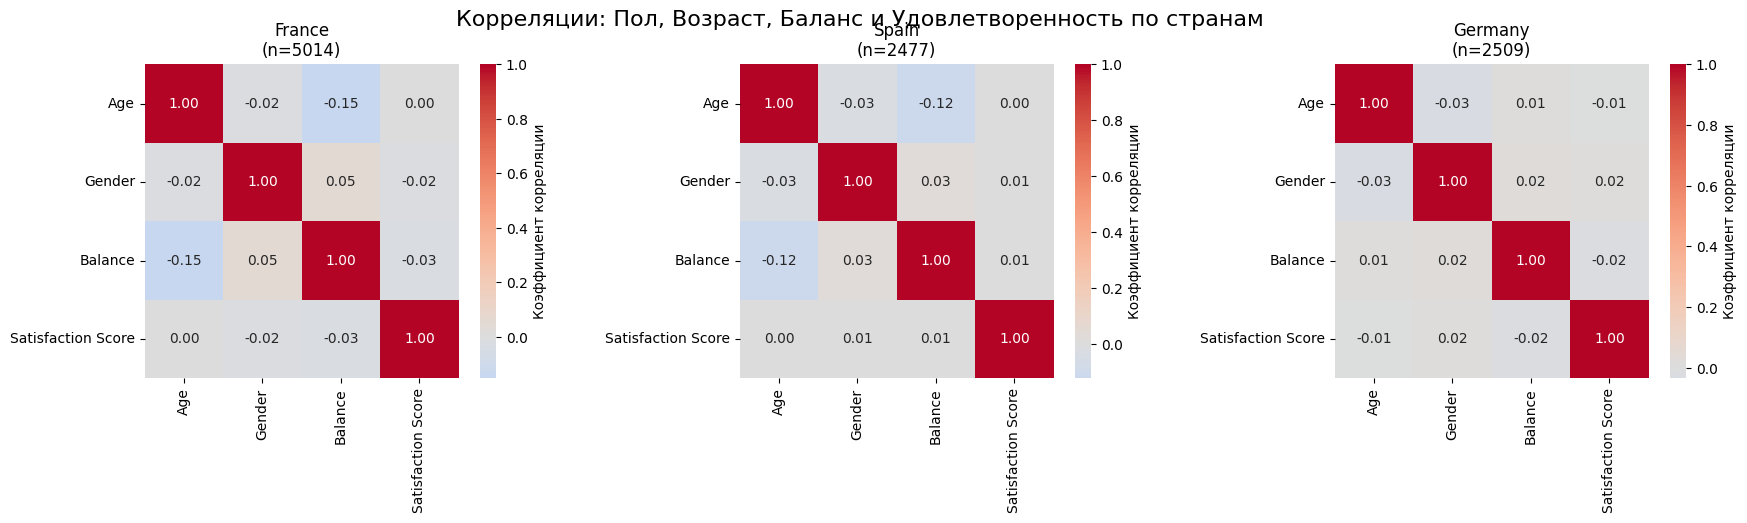

In [116]:
France_corr = []
Spain_corr = []
Germany_corr = []
print(corr_data.corr())
fig, axes = plt.subplots(1, len(countries), figsize=(18, 5))
countries = df['Geography'].unique()
for i,country in enumerate(countries):
    country_data = df[df.Geography == country]
    sat_level = country_data.groupby(['Age','Gender','Balance'])['Satisfaction Score'].mean().reset_index()
    corr_data = pd.get_dummies(sat_level)
    if country == "France":
        France_corr = corr_data.corr()
    elif country == "Spain":
        Spain_corr = corr_data.corr()
    else:
        Germany_corr = corr_data.corr()
    sns.heatmap(corr_data.corr(), 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                ax=axes[i],
                cbar_kws={'label': 'Коэффициент корреляции'})
    
    axes[i].set_title(f'{country}\n(n={len(country_data)})')

plt.suptitle('Корреляции: Пол, Возраст, Баланс и Удовлетворенность по странам', fontsize=16)
plt.tight_layout()
plt.show()
    
    